# Import

In [1]:
import numpy as np 
from os import path
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
tickfontsize=20
labelfontsize = tickfontsize

In [3]:
import datetime

In [4]:
import math

In [5]:
import time

In [6]:
import random

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data

In [12]:
stacked = True

In [13]:
n_core = 18

In [14]:
if stacked:
    #ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/stacked.csv')
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_v1/stacked.csv')
else:
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/ml_data.csv')
    #ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_v1/ml_data.csv')
    #ml_data = pd.read_csv('./all_mofs/stacked.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
ml_data = ml_data.drop([col for col in ml_data.keys() if 'Smiles' in col] + [col for col in 
                                                                             ml_data.keys() if 'Unnamed' in col] + ['#_of_Linkers'] + ['Metal_ID'], axis=1)

In [16]:
ml_data.head()

,filename,Mafp_Br1_C2_C1,Mafp_Br1_C2_C2,Mafp_Br1_C2_C3,Mafp_Br1_C3_Br1,Mafp_Br1_C3_C1,Mafp_Br1_C3_C2,Mafp_Br1_C3_C3,Mafp_Br1_C3_C4,Mafp_Br1_C3_N1,...,mean_CH4_v/v_65_bar,std_CH4_v/v_65_bar,norm_CH4_v/v_100_bar,mean_CH4_v/v_100_bar,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar,pressure,vol_uptake
0,hypotheticalMOF_6000523_i_3_j_19_k_12_m_9_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.84668,58.292255,-2.790110,182.71011,65.484924,NaN,216.32376,81.18772,1.0,0.000000
1,hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.84668,58.292255,0.805583,182.71011,65.484924,0.697362,216.32376,81.18772,1.0,12.409546
2,hypotheticalMOF_5051526_i_1_j_27_k_5_m_9_cat_1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.84668,58.292255,0.506575,182.71011,65.484924,0.349411,216.32376,81.18772,1.0,14.970042
3,hypotheticalMOF_5004666_i_0_j_20_k_12_m_1_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.84668,58.292255,-0.747845,182.71011,65.484924,-0.810289,216.32376,81.18772,1.0,11.924002
4,hypotheticalMOF_36515_i_2_j_17_k_6_m_2_cat_1.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.84668,58.292255,0.183220,182.71011,65.484924,NaN,216.32376,81.18772,1.0,49.924683


In [17]:
for i in ml_data.keys():
    print(i)

filename
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp_C1_N3_N2
Mafp_C1_N3_N

Caution when running below

In [18]:
# ml_data = ml_data.drop(['norm_Dom._Pore_(ang.)', 'norm_Max._Pore_(ang.)',
# 'norm_Void_Fraction',
# 'norm_Surf._Area_(m2/g)',
# 'norm_Vol._Surf._Area',
# 'norm_Density'], axis=1)

In [19]:
def norm_col(df, col_name):
    
    nrow = len(df)
    mean = df[col_name].mean()
    std = df[col_name].std()
    
    df['norm_' + col_name] = (df[col_name] - mean) / std
    #df['mean_' + col_name] = [mean for i in range(nrow)]
    #df['std_' + col_name] = [std for i in range(nrow)]
    return mean, std

In [20]:
#default is below 

other_props = ['norm_Dom._Pore_(ang.)',
 'norm_Max._Pore_(ang.)',
 'norm_Void_Fraction',
 'norm_Surf._Area_(m2/g)',
 'norm_Vol._Surf._Area',
 'norm_Density',
  'norm_valence_pa',
   'norm_atomic_rad_pa_(angstroms)',
     'norm_affinity_pa_(eV)',
       'norm_ionization_potential_pa_(eV)',
           'norm_electronegativity_pa']

# other_props = ['norm_valence_pa',
#    'norm_atomic_rad_pa_(angstroms)',
#      'norm_affinity_pa_(eV)',
#        'norm_ionization_potential_pa_(eV)',
#            'norm_electronegativity_pa']

In [21]:
#merge gravimetric uptake
if not stacked:
    y_data = pd.read_excel('/home/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx')
    ml_data = ml_data.join(y_data[['Crystal ID#', 'CH4 cm3/g 35 bar']].set_index('Crystal ID#'), on='Crystal_ID#')

In [22]:
#replace all spaced cols with _
if not stacked:
    for key in ml_data.keys():
        if ' ' in key:
            new_key = key.replace(' ', '_')
            ml_data[new_key] = ml_data[key]
            ml_data = ml_data.drop(key, axis=1)

In [23]:
#merge gravimetric uptake
if not stacked:
    y_data = pd.read_excel('/home/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx')
    ml_data = ml_data.join(y_data[['Crystal ID#', 'CH4 cm3/g 35 bar']].set_index('Crystal ID#'), on='Crystal_ID#')

#replace all spaced cols with _
if not stacked:
    for key in ml_data.keys():
        if ' ' in key:
            new_key = key.replace(' ', '_')
            ml_data[new_key] = ml_data[key]
            ml_data = ml_data.drop(key, axis=1)

In [24]:
def get_cat(s):
    '''
    Returns interpenetration
    '''
    if 'cat' in s:
        return int(s.split('_')[-1][0])
    else:
        return 0

In [25]:
#uncomment below to create weighted interpenetration feature and norm it
# weighted_cat = [get_cat(i) for i in ml_data['filename'].tolist()]
# ml_data['weighted_cat'] = weighted_cat
# norm_col(ml_data, 'weighted_cat')
# other_props.append('norm_weighted_cat')
# ml_data.head()

In [26]:
#uncomment below to create one-hot interpenetration feature and norm it
one_hot = [[0]*4 for i in range(len(ml_data))]
for i, f in enumerate(ml_data['filename'].tolist()):
    one_hot[i][get_cat(f)] = 1
oh_1 = []
oh_2 = []
oh_3 = []
oh_4 = []
for i in one_hot:
    oh_1.append(i[0])
    oh_2.append(i[1])
    oh_3.append(i[2])
    oh_4.append(i[3])
ml_data['oh_1'] = oh_1
ml_data['oh_2'] = oh_2
ml_data['oh_3'] = oh_3
ml_data['oh_4'] = oh_4
other_props.extend(['oh_1','oh_2','oh_3','oh_4'])
ml_data.head()

,filename,Mafp_Br1_C2_C1,Mafp_Br1_C2_C2,Mafp_Br1_C2_C3,Mafp_Br1_C3_Br1,Mafp_Br1_C3_C1,Mafp_Br1_C3_C2,Mafp_Br1_C3_C3,Mafp_Br1_C3_C4,Mafp_Br1_C3_N1,...,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar,pressure,vol_uptake,oh_1,oh_2,oh_3,oh_4
0,hypotheticalMOF_6000523_i_3_j_19_k_12_m_9_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.484924,NaN,216.32376,81.18772,1.0,0.000000,0,0,1,0
1,hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.484924,0.697362,216.32376,81.18772,1.0,12.409546,0,1,0,0
2,hypotheticalMOF_5051526_i_1_j_27_k_5_m_9_cat_1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.484924,0.349411,216.32376,81.18772,1.0,14.970042,0,1,0,0
3,hypotheticalMOF_5004666_i_0_j_20_k_12_m_1_cat_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.484924,-0.810289,216.32376,81.18772,1.0,11.924002,0,0,0,1
4,hypotheticalMOF_36515_i_2_j_17_k_6_m_2_cat_1.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.484924,NaN,216.32376,81.18772,1.0,49.924683,0,1,0,0


In [27]:
#only do if using grav. uptake as property
#norm gravimetric uptake
if not stacked:
    target_mean, target_std = norm_col(ml_data, 'CH4_cm3/g_35_bar')

In [28]:
if stacked:
    target_mean, target_std = norm_col(ml_data, 'vol_uptake')
    property_used = 'norm_vol_uptake'
    #target_mean = float(ml_data[property_used.replace('norm', 'mean')][0])
    #target_std = float(ml_data[property_used.replace('norm', 'std')][0])
else:
    property_used = 'norm_CH4_cm3/g_35_bar'

In [29]:
for i in ml_data.keys():
    print(i)

filename
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp_C1_N3_N2
Mafp_C1_N3_N

In [30]:
#adjustable parameters
total_frac = 1
start_str = 'Density'
end_str = 'norm_Dom._Pore_(ang.)'
training_pct = .7 #.9 gives best results w/ random state = 2
patience = 10 #10 is Deepak default
batch_size = 1 #1 is default

In [31]:
#remove MOFs w/ excessive linkers or too little linkers
#ml_data = ml_data[(ml_data['#_of_Linkers'] < 7) & (ml_data['#_of_Linkers'] > 1)]

In [32]:
len(ml_data)

533430

In [33]:
def eq_space(x, y, n, force_int=False):
    step = (y - x) / (n - 1)
    if force_int:
        return [int(x + step * i) for i in range(n)]
    return [x + step * i for i in range(n)]

In [34]:
#define default params
defaults = {"patience":10, "training_pct":.8, "n_layer":2, "n_unit":10, "activation":'relu', "loss":'mse', 
            "opt":'adam', "val_pct":.2} #patience, training fraction, n hidden layers, n hidden units, activation, loss, optimizer, validation split

In [35]:
#define initial grid
init_grid = {"patience":eq_space(20, 1000, 5, True), "training_pct":eq_space(.5, .8, 5), 
             "n_layer":eq_space(3, 20, 5, True), "n_unit":eq_space(20, 1000, 5, True), "activation":['relu', 'tanh', 'sigmoid'],
             "loss":['huber_loss', 'mse', 'mean_absolute_error', 'logcosh'], 
            "opt":['sgd', 'rmsprop', 'adamax', 'adam', 'adagrad'], "val_pct":[.3, .5, 5]}
#patience, training fraction, n hidden layers, n hidden units, activation, loss, optimizer, validation split

In [36]:
if total_frac != 1:
    ml_data = ml_data.sample(frac=total_frac, random_state=0)

In [37]:
##uncomment below when dealing with stacked
if stacked:
    
    ml_data['log_pressure'] = np.log(ml_data['pressure'].tolist())
    log_p_mean, log_p_std = norm_col(ml_data, 'log_pressure')

    max_p = max(ml_data['norm_log_pressure'].tolist())
    min_p = min(ml_data['norm_log_pressure'].tolist())

    other_props.append('norm_log_pressure')
    
    for ind, col in enumerate(ml_data.columns):
        if start_str == col:
            start_col = ind + 1
        elif end_str == col:
            end_col = ind
    ml_data = ml_data.drop(ml_data.columns[ml_data.isna().all()].tolist(), axis=1) #drop na cols
    features = list(ml_data.columns[start_col:end_col])
    features = features + other_props 
    
    
    c = ml_data['filename'].unique().tolist()

    import random

    random.seed = 2

    #c = list(b.groups.keys())
    random.shuffle(c)

    n_groups = len(c)

    train_ind = round(n_groups*training_pct)

    train_groups = c[0:train_ind]
    test_groups = c[train_ind:]

    train_dataset = ml_data.loc[ml_data['filename'].isin(train_groups)]

    test_dataset = ml_data.loc[ml_data['filename'].isin(test_groups)]

    isotherm_inds = [0, 11, 89, 170, 367, 600, 1100, 3021, 5321, 7621]
    isotherm_files = [test_dataset.iloc[i]['filename'] for i in isotherm_inds]
    isotherm_df = test_dataset.loc[test_dataset['filename'].isin(isotherm_files)]

    isotherm_pressures = []
    isotherm_uptakes = []
    for i in isotherm_files:
        l1 = []
        l2 = []
        for row in isotherm_df.iterrows():
            if row[1]['filename'] == i:
                l1.append(row[1]['pressure'])
                l2.append(row[1]['vol_uptake'])
        isotherm_pressures.append(l1)
        isotherm_uptakes.append(l2)

    #del isotherm_df

In [38]:
if not stacked:
    for ind, col in enumerate(ml_data.columns):
        if start_str == col:
            start_col = ind + 1
        elif end_str == col:
            end_col = ind
    ml_data = ml_data.drop(ml_data.columns[ml_data.isna().all()].tolist(), axis=1) #drop na cols
    features = list(ml_data.columns[start_col:end_col])
    features = features + other_props    

In [39]:
len(features)

16

In [40]:
del ml_data

In [41]:
#train_dataset = fp_dat.sample(frac=training_pct,random_state=2) #default is 2
#test_dataset = fp_dat.drop(train_dataset.index)

# Train/test split according to most isolated points

In [ ]:
n_remote = 10000

In [ ]:
import pickle

In [ ]:
with open('./srt/two_pca_pgnorm.pickle', 'rb') as handle:
    srt = pickle.load(handle)

In [ ]:
max([x[0] for x in srt]) == max(ml_data.index)

n_train = round(training_pct*len(srt))
n_train

train_inds = [x[0] for x in srt[:n_remote]]
train_inds

remaining = srt[n_remote:]

remaining

random.shuffle(remaining)

train_ind = n_train - n_remote

train_inds += [x[0] for x in remaining[0:train_ind]]
test_inds = [x[0] for x in remaining[train_ind:]]

len(train_inds) + len(test_inds)

remaining

print(len(train_inds))

train_dataset = ml_data.iloc[train_inds, :]

test_dataset = ml_data.iloc[test_inds, :]

len(train_inds) + len(test_inds)

# Finish pre-processing

In [42]:
train_label = train_dataset[property_used]
test_label = test_dataset[property_used]

In [43]:
train_fp = train_dataset[features].to_numpy().astype('float32')
#del train_dataset
test_fp = test_dataset[features].to_numpy().astype('float32')
#del test_dataset



In [44]:
# train_data = tf.data.Dataset.from_tensor_slices((train_fp.to_numpy().astype(np.float32), 
#                                                      train_label.to_numpy().astype(np.float32))).batch(batch_size)

In [45]:
# test_data = tf.data.Dataset.from_tensor_slices((test_fp.to_numpy().astype(np.float32), 
#                                                     test_label.to_numpy().astype(np.float32))).batch(batch_size)

In [46]:
#clear space
#del train_fp
#del test_fp
#del train_label
#del test_label

/home/modules/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/modules/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


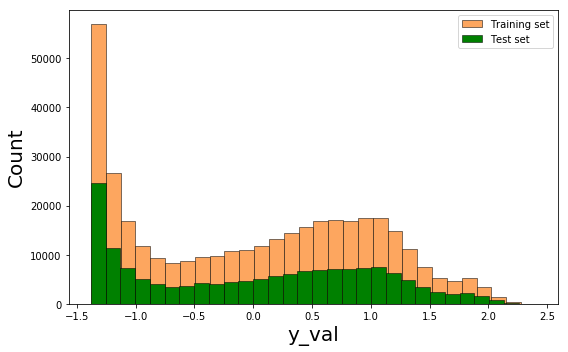

In [47]:
# plot of test and training sets
fig,ax = plt.subplots(figsize = (8,5))
n_bins=30
n, bins, patches = plt.hist(train_label, n_bins, normed=0, lw=0.5, edgecolor='k', facecolor='#FDA65F', alpha=1,label = 'Training set')
n, bins, patches = plt.hist(test_label, n_bins, normed=0, lw=0.5, edgecolor='k', facecolor='green', alpha=1, label = 'Test set')
plt.xlabel('y_val',fontsize=labelfontsize)
plt.ylabel('Count',fontsize=labelfontsize)
#ax.set_xlim(2,12)
ax.legend()
fig.tight_layout()
plt.savefig('%s.png'%property_used,dpi=200)


In [48]:
# Summary of training ( and test)
# train_stats = train_fp.describe()
# train_stats = train_stats.transpose()
# train_stats

In [49]:
# test_stats = test_fp.describe()
# test_stats = test_stats.transpose()
# test_stats

In [50]:
# define the keras model
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=[len(features)]), #default is 100
        #layers.Dense(100, activation='relu'), #default is not exist
        #layers.Dropout(.1), #default is not exist
        #layers.Dense(100, activation='relu'), #default is not exist
        #layers.Dropout(.1), #default is not exist
        layers.Dense(100, activation='relu'), #default is 100
        #layers.Dropout(.1), #default is not exist
        layers.Dense(100, activation='relu'), #default is 100
        #layers.Dropout(.1), #default is not exist
        #layers.Dense(1)
        layers.Dense(1, activation='linear') #default activation is None
    ])

#     model = keras.Sequential([
#         layers.Dense(400, activation='relu', input_shape=[len(train_fp.keys())]),
#         layers.Dense(400, activation='relu'),
#         layers.Dense(100, activation='relu'),
#         #layers.Dense(1)
#         layers.Dense(1, activation='linear')
#     ])

    opt = keras.optimizers.Adam(learning_rate=.001) #default is .001
    
    model.compile(loss='mse',
        optimizer=opt,
        metrics=['mae', 'mse'])
    return model

In [51]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 22,001
Trainable params: 22,001
Non-trainable params: 0
_________________________________________________________________


In [52]:
# NN model training
start = time.time()

EPOCHS = 1000

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
checkpoint_callbacks = keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss',\
                                                      verbose=1, save_best_only=True, mode='min')

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# early_history = model.fit(train_fp.to_numpy(), train_label.to_numpy(), batch_size=1000,
#                     epochs=EPOCHS, validation_split = 0.2, verbose=1,\
#                           callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

#default below

early_history = model.fit(train_fp, train_label.to_numpy(), batch_size=32,
                    epochs=EPOCHS, validation_split = 0.2, verbose=1,\
                          callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])
##############################################


# early_history = model.fit(train_data,
#                         epochs=EPOCHS, validation_data = train_data, verbose=1,\
#                               callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

end = time.time()

print("Time elapsed: ", end-start)

Train on 298796 samples, validate on 74700 samples
Epoch 1/1000
298592/298796 [============================>.] - ETA: 0s - loss: 0.0310 - mae: 0.1278 - mse: 0.0310
Epoch 00001: val_loss improved from inf to 0.03238, saving model to model_checkpoint.h5

Epoch: 0, loss:0.0310,  mae:0.1278,  mse:0.0310,  val_loss:0.0324,  val_mae:0.1369,  val_mse:0.0324,  
298796/298796 [==============================] - 30s 99us/sample - loss: 0.0310 - mae: 0.1278 - mse: 0.0310 - val_loss: 0.0324 - val_mae: 0.1369 - val_mse: 0.0324
Epoch 2/1000
298656/298796 [============================>.] - ETA: 0s - loss: 0.0259 - mae: 0.1156 - mse: 0.0259
Epoch 00002: val_loss improved from 0.03238 to 0.03085, saving model to model_checkpoint.h5
298796/298796 [==============================] - 29s 98us/sample - loss: 0.0259 - mae: 0.1156 - mse: 0.0259 - val_loss: 0.0308 - val_mae: 0.1371 - val_mse: 0.0308
Epoch 3/1000
298464/298796 [============================>.] - ETA: 0s - loss: 0.0246 - mae: 0.1121 - mse: 0.0246


Text(0, 0.5, 'MAE')

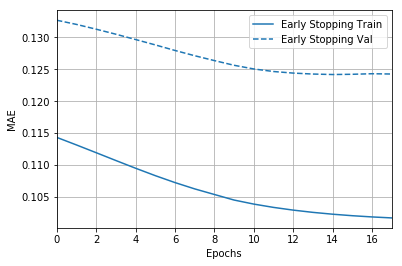

In [53]:
# Check if run converged
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': early_history}, metric = "mae")
#plt.ylim([0, 0.15])
plt.ylabel('MAE')

In [54]:
del early_history
del features, train_groups, test_groups, n_groups

In [55]:
def get_rmse(a, b):
    '''
    Compute rmse between a and b
    '''
    return math.sqrt(np.mean(np.square(np.subtract(a, b))))

In [56]:
#target_mean = 121.689253
#target_std = 88.163575

In [57]:
def unscale(property_name, test_predictions, train_predictions, test_label, train_label):
    '''
    Undo the scaling on predictions of test set, labels of test set, labels of training set
    '''
    mean = target_mean
    std = target_std
    res_test_predictions = (test_predictions * std) + mean
    res_test_label = (test_label * std) + mean
    res_train_label = (train_label * std) + mean    
    res_train_predictions = (train_predictions * std) + mean   
    return res_test_predictions, res_test_label, res_train_label, res_train_predictions

In [58]:
test_predictions = model.predict(test_fp).flatten()
train_predictions = model.predict(train_fp).flatten()

# #normalize test values
# mean = float(ml_data['mean_CH4_v/v_1_bar'][0])
# std = float(ml_data['std_CH4_v/v_1_bar'][0])
# res_test_predictions = (test_predictions * std) + mean
# res_test_label = (test_label * std) + mean
# res_train_label = (train_label * std) + mean
# ################

In [59]:
res_test_predictions, res_test_label, res_train_label, res_train_predictions = unscale(property_used, test_predictions, train_predictions, test_label, train_label)

This is Test RMSE:  13.142470694664002
This is Train RMSE:  12.805810219540477


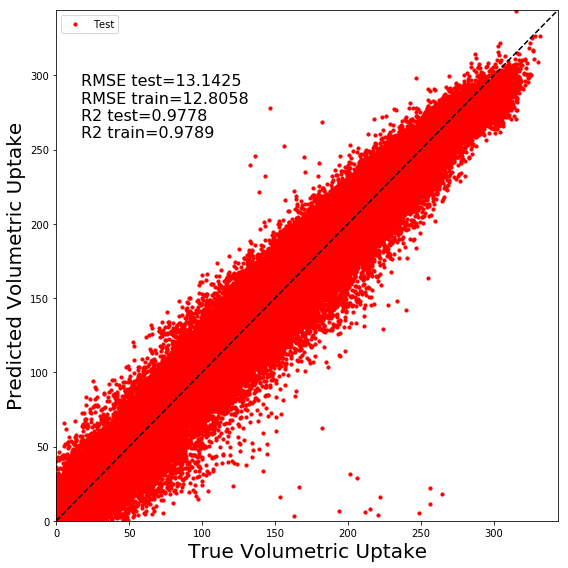

In [60]:
# Evaluation of test error and plotting parity

#model = tf.keras.models.load_model('model_checkpoint_bandgap.h5')



fig1,ax1 = plt.subplots(figsize = (8,8))


#plot un-normed
#loss, mae, mse = model.evaluate(test_fp.to_numpy(), res_test_label.to_numpy(), verbose=2)
#print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))
#tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), res_train_label.to_numpy(), verbose=2)
#tr_rmse = math.sqrt(tr_mse)
#rmse = math.sqrt(mse)
rmse = get_rmse(res_test_label, res_test_predictions)

tr_rmse = get_rmse(res_train_label, res_train_predictions)

from sklearn.metrics import r2_score as r2

r2_val = r2(y_true=res_test_label, y_pred=res_test_predictions)
r2_tr = r2(y_true=res_train_label, y_pred=res_train_predictions)

print("This is Test RMSE: ", rmse)
print("This is Train RMSE: ", tr_rmse)

ax1.scatter(res_test_label, res_test_predictions, c='r',s=10, label='Test')
ax1.set_xlabel('True Volumetric Uptake',fontsize=labelfontsize)
ax1.set_ylabel('Predicted Volumetric Uptake',fontsize=labelfontsize)
max_val = max([max(res_test_label),max(res_test_predictions)])+1
ax1.set_xlim(0, max_val)
ax1.set_ylim(0, max_val)

##############################

#default
# loss, mae, mse = model.evaluate(test_fp.to_numpy(), test_label.to_numpy(), verbose=2)
# print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))

# tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), train_label.to_numpy(), verbose=2)

# tr_rmse = math.sqrt(tr_mse)
# rmse = math.sqrt(mse)
#ax1.scatter(test_label, test_predictions, c='r',s=10) 
#ax1.scatter(train_label, train_predictions, c='b',s=10)
# ax1.set_xlabel('True normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
# ax1.set_ylabel('Predicted normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
#ax1.set_xlim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
#ax1.set_ylim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
###############################################
ax1.legend()
plot_x_min, plot_x_max = plt.xlim()
plot_y_min, plot_y_max = plt.ylim()

ax1.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')
text_position_x = plot_x_min + (plot_x_max - plot_x_min) * 0.05
text_position_y = plot_y_max - (plot_y_max - plot_y_min) * 0.25

#ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse), ha='left', fontsize=16)

ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
         "RMSE train=" + str("%.4f" % tr_rmse) + '\n' +
         "R2 test=" + str("%.4f" % r2_val) + '\n' +
         "R2 train=" + str("%.4f" % r2_tr), ha='left', fontsize=16)

# ax1.text(text_position_x, text_position_y, "MAE=" + str("%.4f" % mae) + ' \n' + 
#          "MSE=" + str("%.4f" % mse), ha='left', fontsize=16)
fig1.tight_layout()
plt.savefig('./%s_test_parity_%s.png'%(property_used, total_frac),dpi=200)



In [ ]:
#model.save('./isotherm_model_landgscaling')

# Look for effect of # of remote points

In [ ]:
rmse_tracker = []

In [ ]:
for i in [0, 500, 2000, 10000, 25000, 50000]:
    n_remote = i

    import pickle

    with open('./srt/two_pca_pgnorm.pickle', 'rb') as handle:
        srt = pickle.load(handle)

    max([x[0] for x in srt]) == max(ml_data.index)

    n_train = round(training_pct*len(srt))


    train_inds = [x[0] for x in srt[:n_remote]]

    random.seed = 2
    remaining = srt[n_remote:]


    random.shuffle(remaining)

    train_ind = n_train - n_remote

    train_inds += [x[0] for x in remaining[0:train_ind]]
    test_inds = [x[0] for x in remaining[train_ind:]]

    len(train_inds) + len(test_inds)

    print(len(train_inds))

    train_dataset = ml_data.iloc[train_inds, :]

    test_dataset = ml_data.iloc[test_inds, :]

    len(train_inds) + len(test_inds)
    
    train_label = train_dataset[property_used]
    test_label = test_dataset[property_used]

    train_fp = train_dataset[features].to_numpy().astype('float32')
    del train_dataset
    test_fp = test_dataset[features].to_numpy().astype('float32')
    del test_dataset

    model = build_model()
    model.summary()

    # NN model training
    start = time.time()

    EPOCHS = 1000

    model = build_model()

    # The patience parameter is the amount of epochs to check for improvement
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
    checkpoint_callbacks = keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss',\
                                                          verbose=1, save_best_only=True, mode='min')

    log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # early_history = model.fit(train_fp.to_numpy(), train_label.to_numpy(), batch_size=1000,
    #                     epochs=EPOCHS, validation_split = 0.2, verbose=1,\
    #                           callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

    #default below

    early_history = model.fit(train_fp, train_label.to_numpy(), batch_size=32,
                        epochs=EPOCHS, validation_split = 0.2, verbose=1,\
                              callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])
    ##############################################


    # early_history = model.fit(train_data,
    #                         epochs=EPOCHS, validation_data = train_data, verbose=1,\
    #                               callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

    end = time.time()

    print("Time elapsed: ", end-start)

    def get_rmse(a, b):
        '''
        Compute rmse between a and b
        '''
        return math.sqrt(np.mean(np.square(np.subtract(a, b))))





    #target_mean = 121.689253
    #target_std = 88.163575

    def unscale(property_name, test_predictions, train_predictions, test_label, train_label):
        '''
        Undo the scaling on predictions of test set, labels of test set, labels of training set
        '''
        mean = target_mean
        std = target_std
        res_test_predictions = (test_predictions * std) + mean
        res_test_label = (test_label * std) + mean
        res_train_label = (train_label * std) + mean    
        res_train_predictions = (train_predictions * std) + mean   
        return res_test_predictions, res_test_label, res_train_label, res_train_predictions

    test_predictions = model.predict(test_fp).flatten()
    train_predictions = model.predict(train_fp).flatten()

    # #normalize test values
    # mean = float(ml_data['mean_CH4_v/v_1_bar'][0])
    # std = float(ml_data['std_CH4_v/v_1_bar'][0])
    # res_test_predictions = (test_predictions * std) + mean
    # res_test_label = (test_label * std) + mean
    # res_train_label = (train_label * std) + mean
    # ################

    res_test_predictions, res_test_label, res_train_label, res_train_predictions = unscale(property_used, test_predictions, train_predictions, test_label, train_label)

    rmse = get_rmse(res_test_label, res_test_predictions)
    
    rmse_tracker.append((i, rmse))

In [ ]:
rmse_tracker

# Isotherm example plots

In [ ]:
isotherm_inds

In [ ]:
i = 0

In [ ]:
trial_fp = test_fp[isotherm_inds[i], :-1]

In [ ]:
trial_pressures = eq_space(min_p, max_p, 50)

In [ ]:
trial_arr = np.array([np.concatenate([trial_fp, [p]]) for p in trial_pressures])
#trial_fps = [trial_fp]

In [ ]:
preds = model.predict(trial_arr).flatten()

In [ ]:
mean = target_mean
std = target_std
res_test_predictions = (test_predictions * std) + mean
res_preds = (preds * std) + mean

In [ ]:
res_pressures = np.exp([(i * log_p_std) + log_p_mean for i in trial_pressures]).tolist()

In [ ]:
fig1,ax1 = plt.subplots(figsize = (4,4))
plt.scatter(res_pressures, res_preds, c='b', label='Predicted')
plt.scatter(isotherm_pressures[i], isotherm_uptakes[i], c='r', label='Truth')
plt.legend()
ax1.set_ylabel('Volumetric uptake',fontsize=labelfontsize)
ax1.set_xlabel('Pressure (bar)',fontsize=labelfontsize)
ax1.set_ylim(ymax=300)
plt.tight_layout()

In [ ]:
from sklearn.metrics import r2_score as r2

In [ ]:
r2(y_true=res_test_label, y_pred=res_test_predictions)

In [ ]:
error = test_predictions - test_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

# Test functions

In [ ]:
eq_space(4,9, 5, True)

In [ ]:
rmse(np.array([1,1]), np.array([1,2]))

In [ ]:
total_frac = 1
defaults = [10, .8, 3, 100, 'relu', 'mse', 'adam', .2]
patience = defaults[0]
training_pct = defaults[1]
n_layer = defaults[2]
n_unit = defaults[3]
activation = defaults[4]
loss = defaults[5]
opt = defaults[6]
val_pct = defaults[7]

In [ ]:
mse = evaluate_model(ml_data, total_frac, start_str, end_str, patience, training_pct, n_layer, n_unit, activation, 
                   loss, opt, val_pct)

In [ ]:
mse

In [ ]:
total_frac = .1
defaults = {"patience":10, "training_pct":.8, "n_layer":7, "n_unit":20, "activation":'relu', "loss":'mean_absolute_error', 
            "opt":'rmsprop', "val_pct":.2}
all_grid = {"patience":[10], "training_pct":eq_space(.5, .8, 5), 
             "n_layer":eq_space(3, 20, 5, True), "n_unit":eq_space(20, 1000, 5, True), "activation":['relu', 'tanh', 'sigmoid'],
             "loss":['huber_loss', 'mse', 'mean_absolute_error', 'logcosh'], 
            "opt":['sgd', 'rmsprop', 'adamax', 'adam', 'adagrad'], "val_pct":eq_space(.2, .5, 5)}


init_grid = {"val_pct":eq_space(.2, .5, 5)}

In [ ]:
#patience_d, training_pct_d, n_layer_d, n_unit_d, activation_d, loss_d, opt_d, val_pct_d 
r = varyParams(ml_data, defaults, init_grid, total_frac, start_str, end_str)

In [ ]:
r

In [ ]:
start = time.time()

training_pct = .9
total_frac = 1
mse, model = evaluate_model(ml_data, total_frac, start_str, end_str, 10, training_pct, 3, 200, 'relu', 
                   'mse', 'adam', .2, batch_size=5000, norm=False)

end = time.time()

print("Time elapsed: ", end - start)

In [ ]:
mse

In [ ]:
tr_loss, tr_mae, tr_mse = model.evaluate(train_data, verbose=2)

In [ ]:
tr_mse

In [ ]:
math.sqrt(mse)

In [ ]:
preds = model.predict(test_data)

In [ ]:
len(preds)

In [ ]:
preds.size

In [ ]:
len(test_label.values)

In [ ]:
plt.scatter(preds, test_label, c='b', label)